<a href="https://colab.research.google.com/github/Arpitsinghvampire/computer_vision/blob/main/object_localization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ayulockin/synthetic_datasets
%cd synthetic_datasets/MNIST/

%mkdir images

!unzip -q MNIST_Converted_Training.zip -d images/
!unzip -q MNIST_Converted_Testing.zip -d images/



fatal: destination path 'synthetic_datasets' already exists and is not an empty directory.
/content/synthetic_datasets/MNIST
mkdir: cannot create directory ‘images’: File exists
replace images/MNIST_Converted_Training/converted_training14272.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
%cd ../..

/content


In [104]:
import pandas as pd
from os import path

S='synthetic_datasets'
M='MNIST'
I='images'
train_df=pd.read_csv(path.join(S,M,'training_data.csv'),header=None)
columns=['path','class_index','xmin','ymin','xmax','ymax']
train_df.columns=columns


In [105]:
train_df

,path,class_index,xmin,ymin,xmax,ymax
0,converted_training1.png,4,0.49,0.15,0.77,0.43
1,converted_training2.png,1,0.64,0.26,0.92,0.54
2,converted_training3.png,0,0.42,0.39,0.70,0.67
3,converted_training4.png,7,0.58,0.10,0.86,0.38
4,converted_training5.png,8,0.21,0.23,0.49,0.51
...,...,...,...,...,...,...
59995,converted_training59996.png,7,0.32,0.58,0.60,0.86
59996,converted_training59997.png,1,0.48,0.33,0.76,0.61
59997,converted_training59998.png,6,0.22,0.06,0.50,0.34
59998,converted_training59999.png,1,0.39,0.23,0.67,0.51


In [106]:
#now lets do the same for the test set
test_df=pd.read_csv(path.join(S,M,'test_data.csv'),header=None)
test_df.columns=columns

In [76]:
test_df

,path,class_index,xmin,ymin,xmax,ymax
0,converted_testing1.png,2,0.20,0.45,0.48,0.73
1,converted_testing2.png,0,0.02,0.03,0.30,0.31
2,converted_testing3.png,4,0.55,0.39,0.83,0.67
3,converted_testing4.png,8,0.38,0.42,0.66,0.70
4,converted_testing5.png,7,0.69,0.17,0.97,0.45
...,...,...,...,...,...,...
9995,converted_testing9996.png,5,0.46,0.34,0.74,0.62
9996,converted_testing9997.png,9,0.54,0.25,0.82,0.53
9997,converted_testing9998.png,8,0.50,0.32,0.78,0.60
9998,converted_testing9999.png,0,0.62,0.61,0.90,0.89


In [77]:
row_1=train_df.iloc[0].to_numpy()
row_1

array(['converted_training1.png', 4, 0.49, 0.15, 0.77, 0.43], dtype=object)

In [118]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

def  load_image_for_vis(path):
  image=tf.io.read_file(path)
  image=tf.image.decode_png(image,channels=1)
  image=tf.image.grayscale_to_rgb(image)
  image=image.numpy().astype(np.uint8)
  return image


In [109]:
t='MNIST_Converted_Training'
train_df['path']=train_df['path'].apply(lambda s:path.join(S,M,I,t,s))

t='MNIST_Converted_Testing'
test_df['path']=test_df['path'].apply(lambda s:path.join(S,M,I,t,s))

train_df.head()


,path,class_index,xmin,ymin,xmax,ymax
0,synthetic_datasets/MNIST/images/MNIST_Converte...,4,0.49,0.15,0.77,0.43
1,synthetic_datasets/MNIST/images/MNIST_Converte...,1,0.64,0.26,0.92,0.54
2,synthetic_datasets/MNIST/images/MNIST_Converte...,0,0.42,0.39,0.70,0.67
3,synthetic_datasets/MNIST/images/MNIST_Converte...,7,0.58,0.10,0.86,0.38
4,synthetic_datasets/MNIST/images/MNIST_Converte...,8,0.21,0.23,0.49,0.51


In [114]:
row_1=train_df.iloc[0].to_numpy().tolist()
row_1

['synthetic_datasets/MNIST/images/MNIST_Converted_Training/converted_training1.png',
 4,
 0.49,
 0.15,
 0.77,
 0.43]

49 15 77 43


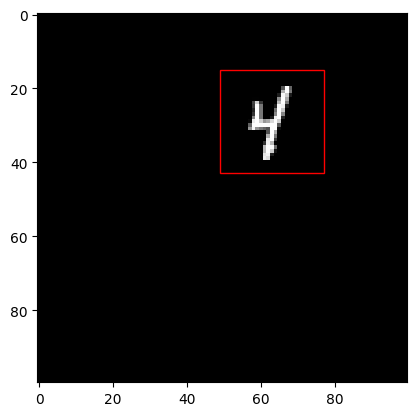

In [127]:
import matplotlib.patches as patches
import cv2
fig,ax=plt.subplots()
im=load_image_for_vis(row_1[0])
ax.imshow(im)


x1,y1,x2,y2=[int(v*100) for v in row_1[2:]]
print(x1,y1,x2,y2)

width=x2-x1
height=y2-y1
rect=patches.Rectangle((x1,y1),width,height,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)

plt.show()

In [128]:
train_df['class_index'].value_counts()

class_index
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

In [129]:
val_df,test_df=test_df[:5000],test_df[5000:]
len(val_df),len(test_df)

(5000, 5000)

In [130]:
box_columns=['xmin','ymin','xmax','ymax']
box_train=train_df[box_columns].to_numpy()
box_test=test_df[box_columns].to_numpy()
box_val=val_df[box_columns].to_numpy()



In [131]:
class_index_train=train_df['class_index'].to_numpy()
class_index_test=test_df['class_index'].to_numpy()
class_index_val=val_df['class_index'].to_numpy()



In [132]:
train_dataset=tf.data.Dataset.from_tensor_slices((train_df['path'].to_list(),
                                                  {'box':box_train,
                                                     'class':class_index_train   }

                                                  ))

In [133]:
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), {'box': TensorSpec(shape=(4,), dtype=tf.float64, name=None), 'class': TensorSpec(shape=(), dtype=tf.int64, name=None)})>

In [134]:
#now we do the same for the test set
test_dataset=tf.data.Dataset.from_tensor_slices((test_df['path'].to_list(),
                                                 {
                                                     'box':box_test,
                                                     'class':class_index_test
                                                 }))

test_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), {'box': TensorSpec(shape=(4,), dtype=tf.float64, name=None), 'class': TensorSpec(shape=(), dtype=tf.int64, name=None)})>

In [135]:
val_dataset=tf.data.Dataset.from_tensor_slices((val_df['path'].to_list(),
                                                 {
                                                     'box':box_val,
                                                     'class':class_index_val
                                                 }))

test_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), {'box': TensorSpec(shape=(4,), dtype=tf.float64, name=None), 'class': TensorSpec(shape=(), dtype=tf.int64, name=None)})>

In [136]:
@tf.function
def load_image(image_path,label_dict):
  image=tf.io.read_file(image_path)
  image=tf.image.decode_png(image,channels=1)
  image=tf.image.grayscale_to_rgb(image)
  return (image,label_dict)

In [137]:
from tensorflow.data import AUTOTUNE

SHUFFLE_VAL=len(train_dataset)
BATCH_SIZE=1000
train_dataset=train_dataset.shuffle(SHUFFLE_VAL).map(load_image).batch(1000).prefetch(AUTOTUNE)

val_dataset=val_dataset.map(load_image).batch(1000).prefetch(AUTOTUNE)
test_dataset=test_dataset.map(load_image).batch(1000).prefetch(AUTOTUNE)

In [138]:
#here we would like to import a pretrained model (here we use the transfer learning )
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2S

model=EfficientNetV2S(weights='imagenet',include_top=False,input_shape=(100,100,3))
model.summary()

Model: "efficientnetv2-s"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 rescaling_3 (Rescaling)     (None, 100, 100, 3)          0         ['input_6[0][0]']             
                                                                                                  
 stem_conv (Conv2D)          (None, 50, 50, 24)           648       ['rescaling_3[0][0]']         
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 50, 50, 24)           96        ['stem_conv[0][0]']           
 n)                                                                                

In [139]:
for layer in model.layers[:-5]:
  layer.trainable=False

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import *

mymodel=Sequential([
    model,
    GlobalAveragePooling2D(),
    Dense(10,activation='softmax')
])

NameError: name 'model' is not defined

In [141]:
mymodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-s (Function  (None, 4, 4, 1280)        20331360  
 al)                                                             
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 10)                12810     
                                                                 
Total params: 20344170 (77.61 MB)
Trainable params: 343050 (1.31 MB)
Non-trainable params: 20001120 (76.30 MB)
_________________________________________________________________


In [2]:
from tensorflow.keras.models import Model
input=Input((100,100,3))
feature_vector=mymodel(input)

class_output_path=Dense(128,activation='relu')(feature_vector)
class_output_path=Dense(10,activation='softmax',name='class')(class_output_path)

box_output_path=Dense(128,activation='relu')(feature_vector)
box_output_path=Dense(4,name='box')(box_output_path)

model_1=Model(inputs=input,outputs=[class_output_path,box_output_path])

model_1.summary()

NameError: name 'Input' is not defined

In [147]:
from tensorflow.keras.losses import MeanSquaredError,SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalAccuracy,MeanAbsoluteError


model_1.compile(loss={'class':SparseCategoricalCrossentropy(),
                      'box': MeanSquaredError()},
                optimizer=Adam(learning_rate=0.001),
                metrics={'class':[CategoricalAccuracy()],
                         'box':[MeanAbsoluteError()]},run_eagerly=True)

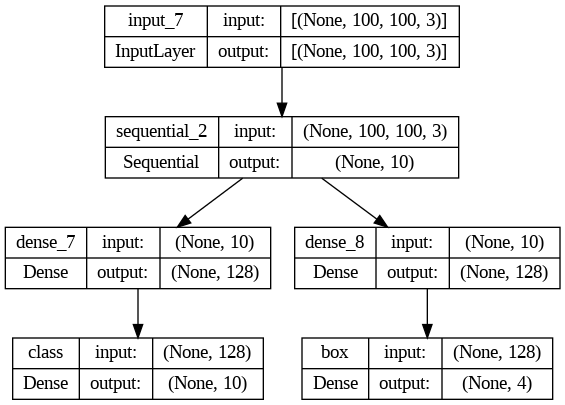

In [148]:
from keras.utils import plot_model
plot_model(model_1,show_layer_names=True,show_shapes=True)

In [1]:
#here we try to bring in the callbacks
from tensorflow.keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)
model_1.fit(train_dataset,epochs=2,validation_data=val_dataset,callbacks=[es])

NameError: name 'model_1' is not defined